<a href="https://colab.research.google.com/github/sajib-222/Digital-Image-Processing/blob/main/TEST_2_ID-2125051016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

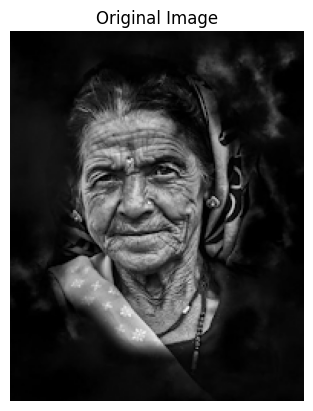

In [49]:
# Load an image (change 'image.jpg' to your own image path if needed)
image = cv2.imread('/content/drive/MyDrive/Digital Image Process/image/original.png')  # Load image in BGR format
image = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)

# Show the original image
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [39]:
def add_gaussian_noise(image, mean=0, sigma=25):
    """
    Adds Gaussian noise to an image.

    Parameters:
    - image: Input image (uint8)
    - mean: Mean of the Gaussian distribution
    - sigma: Standard deviation

    Returns:
    - noisy_image: Image with Gaussian noise added
    """
    gaussian = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy_image = image.astype(np.float32) + gaussian
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image


In [40]:
# Add Gaussian noise
noisy_image = add_gaussian_noise(image)

# Apply filters
avg_blur = cv2.blur(noisy_image, (5, 5))
gauss_blur = cv2.GaussianBlur(noisy_image, (5, 5), 0)
median_blur = cv2.medianBlur(noisy_image, 5)


In [41]:
laplacian_kernel_8 = np.array([[1,  1,  1],
                               [1, -8,  1],
                               [1,  1,  1]])


In [46]:
laplacian_manual_8 = cv2.filter2D(image, cv2.CV_64F, laplacian_kernel_8)
laplacian_manual_8_norm = cv2.normalize(laplacian_manual_8, None, 0, 255, cv2.NORM_MINMAX)

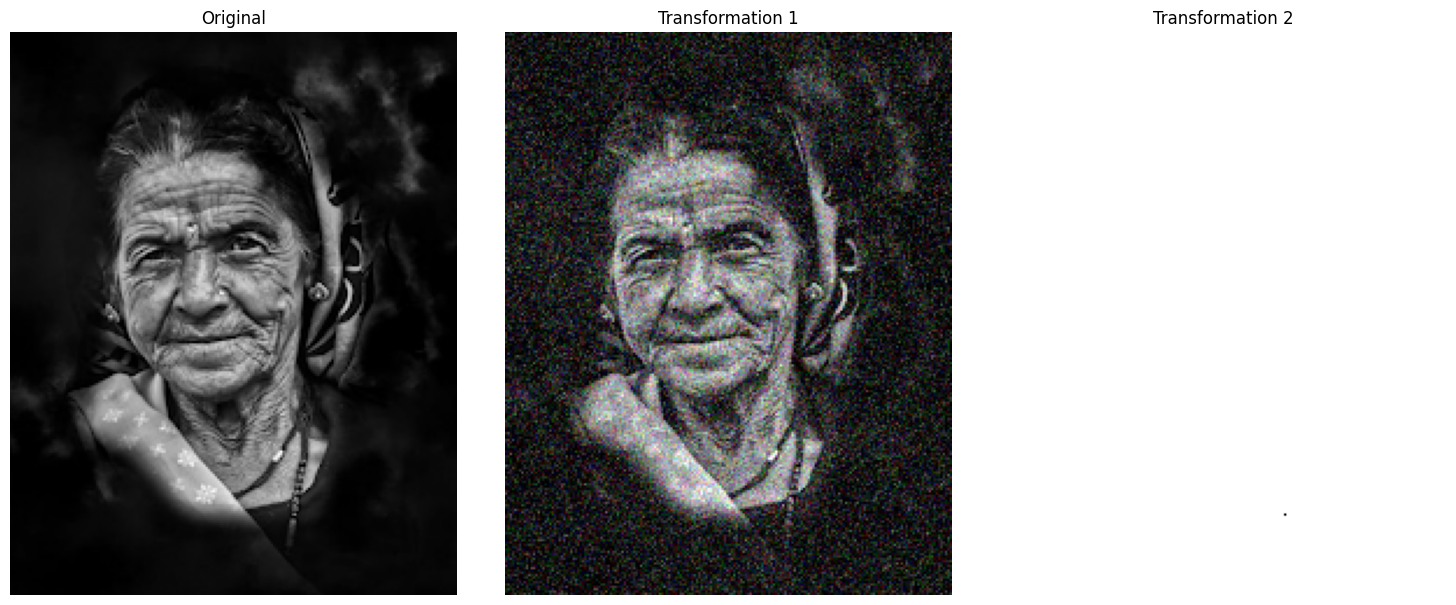

In [47]:
titles = ['Original', 'Transformation 1', 'Transformation 2']
images = [image, noisy_image, laplacian_manual_8_norm]

plt.figure(figsize=(15, 6))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
